# Bank Marketing

The client bank *XYZ* is running a direct marketing (phone calls) campaign. The classification goal is to predict if the client will subscribe a term deposit or not.

The data is obtained from [UCI Machine Learning repository]( http://mlr.cs.umass.edu/ml/datasets/Bank+Marketing)

### Attribute Information:

#### bank client data:
- **age**: (numeric)
- **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- **marital** : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- **education** (categorical: 'basic.4y', 'basic.6y', 'basic.9y','high.school', 'illiterate' ,'professional.course', 'university.degree', 'unknown')
- **default**: has credit in default? (categorical: 'no','yes','unknown')
- **housing: has housing loan? (categorical: 'no','yes','unknown')
- **loan**: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
- **contact**: contact communication type (categorical: 'cellular', 'telephone') 
- **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- **day**: last contact day of the month (numerical: 1, 2, 3, 4, ...)
- **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
- **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- **previous**: number of contacts performed before this campaign and for this client (numeric)
- **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Output variable (desired target):
- **deposit** - has the client subscribed a term deposit? (binary: 'yes','no')



In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
plt.style.use?

In [3]:
#2. import data
df = pd.read_csv("../data/bank.csv")

In [4]:
#3. Display first few records
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
#4. check column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
#5. Find column types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [8]:
#5. Find number of rows and columns
df.shape

(11162, 17)

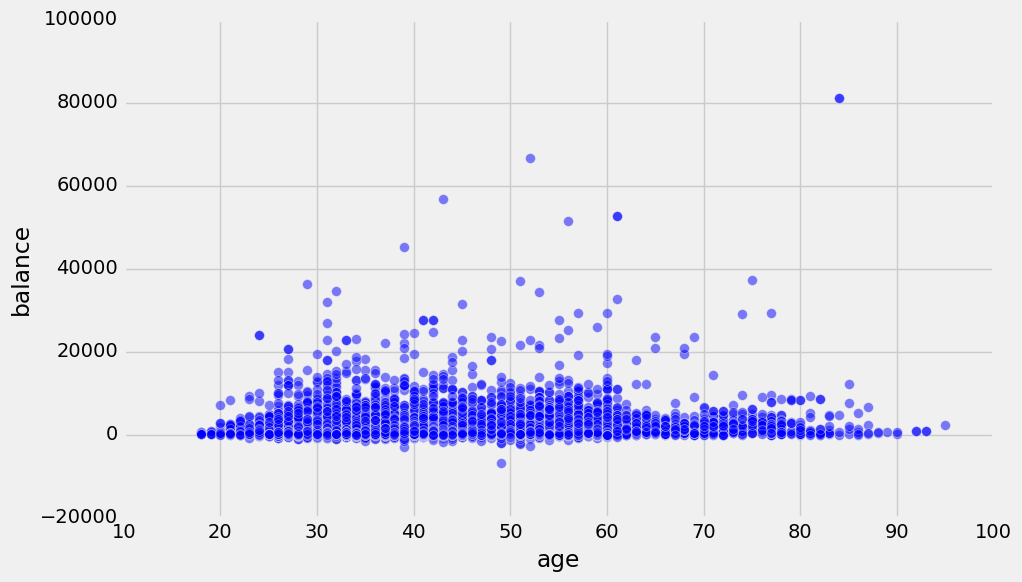

In [12]:
#6. do some exploratory data analysis
#Plot balance vs age
df.plot(kind="scatter", x = "age", y = "balance", s = 50, alpha = 0.5 )

In [13]:
#8. Label encoding

In [14]:
#import preprocessing library

In [15]:
from sklearn import preprocessing

In [16]:
df_encoded = df.apply(preprocessing.LabelEncoder().fit_transform)

In [17]:
#9. View first few records of df_encoded
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


In [18]:
df_encoded.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [20]:
preprocessing.LabelEncoder?

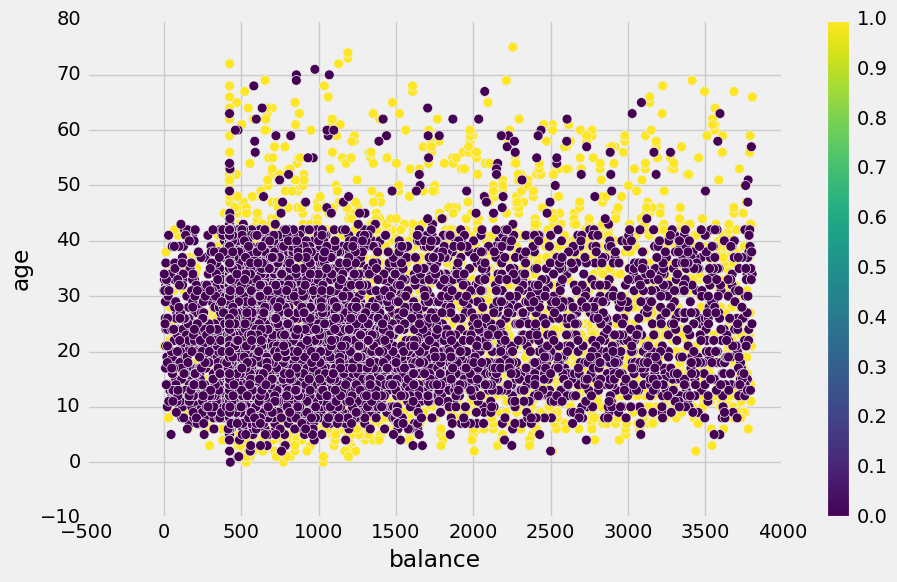

In [21]:
df_encoded.plot(kind="scatter", x ="balance", y="age", c=df_encoded.deposit, s = 50,                 
                cmap=plt.cm.viridis)

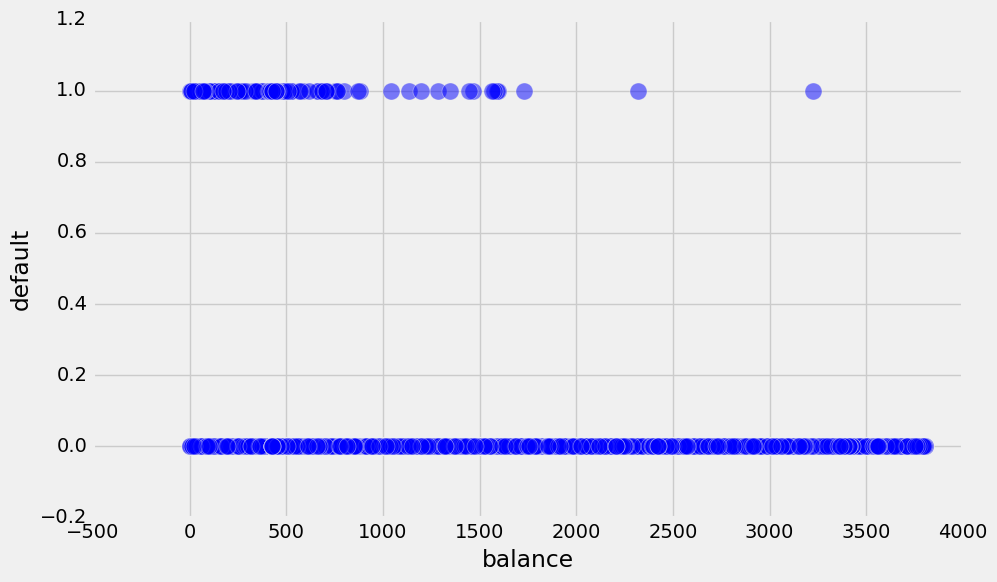

In [23]:
#10. Plot balance vs default
#7. do some exploratory data analysis
#Plot balance vs default
df_encoded.plot(kind="scatter", x ="balance", y="default", s = 150, alpha = 0.5)

# Linear Regression

In [24]:
#11. Select balance, default, loan, previous, deposit
df_subset = df_encoded[["balance", "default", "loan", "previous", "deposit"]]

In [25]:
#12. View first few records of df_subset
df_subset.head()

,balance,default,loan,previous,deposit
0,2288,0,0,0,1
1,469,0,0,0,1
2,1618,0,0,0,1
3,2356,0,0,0,1
4,608,0,0,0,1


**Task** Use balance, default, loan, previous to build a model to predict deposit

In [26]:
#11. import linear regression
from sklearn.linear_model import LinearRegression

In [27]:
?LinearRegression

In [28]:
#12. The first thing is to instantiate the linear regression
model_linear_reg = LinearRegression()

In [29]:
df_encoded.shape

(11162, 17)

In [30]:
#13. Define and X and y for model
X = df_subset.iloc[:, :4]
y = df_subset.iloc[:, 4]

In [31]:
?model_linear_reg.fit

In [32]:
#13. Fit the model
model_linear_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
#14. Display coefficients of the model
model_linear_reg.coef_

array([  6.24765664e-05,  -6.25958899e-02,  -1.33381863e-01,
         3.17295357e-02])

In [39]:
#15. Let's see how to use it for classification
#Predict on the training dataset itself
#(in reality - you wouldn't do this - we will cover that later)

In [40]:
linear_reg_prediction = model_linear_reg.predict(X)

In [41]:
linear_reg_prediction

array([ 0.52608204,  0.41243716,  0.48422274, ...,  0.41143754,
        0.43489153,  0.40962572])

In [42]:
#16. What's one issue with this?
print("Max Prediction:", linear_reg_prediction.max(),  "\n"
      "Min Prediction:", linear_reg_prediction.min())

Max Prediction: 1.52932384722 
Min Prediction: 0.187157901991


In [43]:
#17. Let's classify anything above 0.5 as 1 and below 0.5 as 1

In [44]:
?np.where

In [45]:
linear_reg_prediction_updated = linear_reg_prediction.copy()

In [46]:
#Set predictions above 0.5 as 1
linear_reg_prediction_updated[np.where(linear_reg_prediction_updated>0.5)] = 1

In [47]:
#Set predictions below 0.5 as 0
linear_reg_prediction_updated[np.where(linear_reg_prediction_updated<=0.5)] = 0

In [52]:
# Get metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [53]:
accuracy_score(y, linear_reg_prediction_updated)

0.60320731051782839

In [54]:
confusion_matrix(y, linear_reg_prediction_updated)

array([[4399, 1474],
       [2955, 2334]])

### 20. Exercise

1. Use all the features and build the model.
2. Look into the coefficients
3. Predict on the training dataset itself (We will look into how to evaluate this later today)
4. Report mis-classification rate
5. Use normalization in linear regression and do the same process
6. Use accuracy_score from sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score




In [55]:
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


In [56]:
X = df_encoded.iloc[:, :16]
y = df_encoded.iloc[:,  16]

In [57]:
model_linear_reg_all = LinearRegression()

In [58]:
model_linear_reg_all.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
model_linear_reg_all.coef_

array([  8.45969478e-04,   1.53970191e-03,   3.05600591e-02,
         3.27894788e-02,  -2.83243422e-02,   3.68609035e-05,
        -1.73539180e-01,  -1.03748737e-01,  -1.01152801e-01,
        -1.56329178e-03,   7.26419995e-03,   7.69559977e-04,
        -1.33721042e-02,   6.12869169e-04,   2.02026938e-02,
         3.05241166e-02])

In [60]:
model_linear_reg_all.intercept_

0.07127601491354757

In [61]:
linear_reg_all_prediction = model_linear_reg_all.predict(X)

In [62]:
linear_reg_all_prediction

array([ 0.80695678,  1.11253279,  0.95404084, ...,  0.38342192,
        0.31670596,  0.77477897])

In [63]:
linear_reg_all_prediction_updated = linear_reg_all_prediction.copy()

In [64]:
linear_reg_all_prediction_updated

array([ 0.80695678,  1.11253279,  0.95404084, ...,  0.38342192,
        0.31670596,  0.77477897])

In [65]:
linear_reg_all_prediction_updated[np.where(linear_reg_all_prediction_updated>0.5)] = 1

In [66]:
linear_reg_all_prediction_updated[np.where(linear_reg_all_prediction_updated<=0.5)] = 0

In [67]:
linear_reg_all_prediction_updated

array([ 1.,  1.,  1., ...,  0.,  0.,  1.])

In [69]:
accuracy_score(y, linear_reg_all_prediction_updated)

0.79376455832288118

## Logistic Regression

In [70]:
z = np.linspace(-10,10,100)

In [71]:
Pz = 1 / (1 + np.exp(-z))

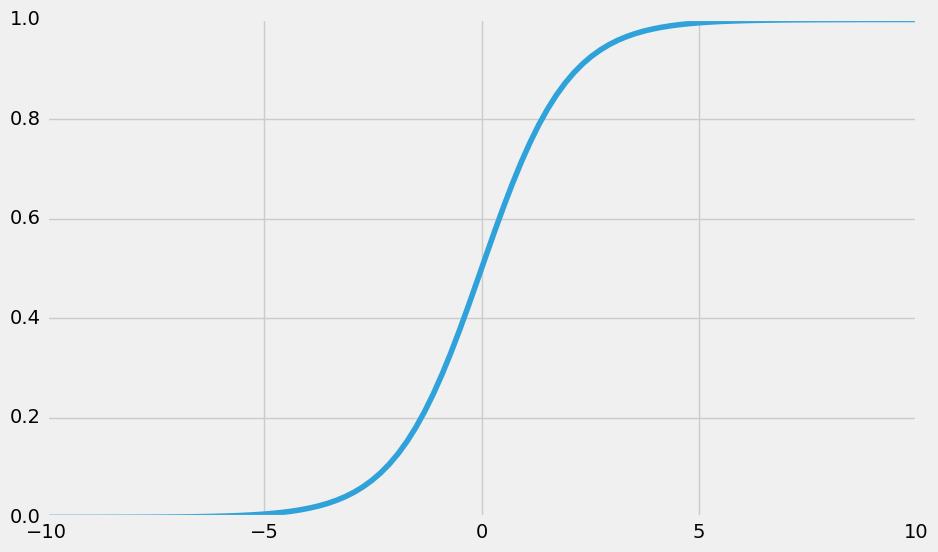

In [72]:
plt.plot(z,Pz)

In [73]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3


In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model_all_logistic = LogisticRegression()

In [76]:
model_all_logistic

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [77]:
model_all_logistic.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
pred_logistic = model_all_logistic.predict(X)

In [79]:
model_all_logistic.predict_proba(X)

array([[ 0.09362079,  0.90637921],
       [ 0.01371905,  0.98628095],
       [ 0.03582167,  0.96417833],
       ..., 
       [ 0.65312219,  0.34687781],
       [ 0.77729762,  0.22270238],
       [ 0.11746108,  0.88253892]])

In [80]:
accuracy_score(y, pred_logistic)

0.7989607597204802

In [83]:
# Build Logistic regression with L1 penalty
model_all_logistic_L1 = LogisticRegression(penalty="l1", C=0.001)

In [84]:
model_all_logistic_L1.fit(X,y)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
pred_logistic_l1 = model_all_logistic_L1.predict(X)

In [86]:
accuracy_score(y,pred_logistic_l1)

0.7329331660992654

In [87]:
model_all_logistic_L1.coef_

array([[-0.01659941,  0.        ,  0.        ,  0.        ,  0.        ,
         0.00012843,  0.        ,  0.        ,  0.        , -0.03488439,
        -0.07538429,  0.00362543, -0.06280309,  0.00249139,  0.        ,
        -0.03535328]])

In [88]:
model_all_logistic.coef_

array([[  5.39131423e-03,   1.04630926e-02,   1.82253065e-01,
          2.05163223e-01,  -2.83499942e-01,   2.25858269e-04,
         -1.06173681e+00,  -7.03062975e-01,  -6.74726785e-01,
         -9.53047484e-03,   3.30559565e-02,   5.22986138e-03,
         -1.31484677e-01,   3.32804702e-03,   1.27949904e-01,
          1.69222679e-01]])